In [1]:
import random

import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('files/dataset.xlsx', sheet_name='data')
df

,Category,URL,Filename,Filename2
0,0,https://www.platki.ru/catalogue/1/,9188d97c-17c7-4195-baa8-c09e18b50e57,878fe071-c34a-4740-8933-3ae66080d3e6
1,0,http://www.pzhm.ru/stolovye-pribory,fb322b72-0177-4bae-8ce7-ad7a2b8e11fa,4a195045-8a0b-42db-83de-da1961dae173
2,0,https://harmonica-tula.ru/catalog/bayany/,67ca34d0-5c80-4a15-9746-23b8cb164cc4,54328b9b-7da1-42ec-b325-4af57887965c
3,0,https://www.yolochka.ru/catalog,fc70309f-0771-43ec-8343-b441224f256a,764a3c8b-e695-4425-bcc9-3bcc328ab869
4,0,https://www.kizlyar.ru/catalog/nozhi-okhotnichi/,8938c23a-2620-42d2-99fd-6ee3781f2c80,24b91f88-4773-4417-8eef-f71fd74e999f
...,...,...,...,...
394,1,https://www.baltmaximus.com/kholodilniki/kholo...,7b45f31f-6b89-42fc-87c9-0d0d934acfbd,NaN
395,1,https://www.elmarket.by/catalog/holodilniki/kh...,12bf1900-e8b0-4236-be0c-4629da5189b4,NaN
396,1,https://www.rbt.ru/cat/kuhonnaya_tehnika/holod...,7d881264-d4ab-46a9-bcde-6d6db64899b2,NaN
397,1,https://newton.by/holodilniki/atlant_khm_4208_...,4c0c2e0b-8611-44c0-b420-58cb14b4e1a3,NaN


In [4]:
df[pd.isna(df['Filename'])]['URL']

72                         https://store78.net/telefony/
295    https://store78.net/telefony/telefon_xiaomi_re...
319    https://teploradost.com.ua/kotly-otopleniya/ga...
Name: URL, dtype: object

In [5]:
urls = df[pd.isna(df['Filename'])]['URL'].values.tolist()
urls

['https://store78.net/telefony/',
 'https://store78.net/telefony/telefon_xiaomi_redmi_9a_2_32gb_seryy_global_version/',
 'https://teploradost.com.ua/kotly-otopleniya/gazovye-kotly/dvuhkonturnye-gazovye-kotly/']

In [6]:
import uuid
import requests
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options


headers = {
    'sec-ch-ua': '"Chromium";v="112", "Google Chrome";v="112", "Not:A-Brand";v="99"',
    'Referer': 'https://curlconverter.com/',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
}


def get_driver():
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(options=options)
    return driver


def download_url(url: str) -> str | None:
    try:
        name = uuid.uuid4()

        driver = get_driver()
        driver.get(url)
        content = driver.page_source
        # content = requests.get(url, headers=headers, timeout=30).content
        with open(f'files/webpages/{name}.html', 'w+') as f:
            f.write(content)
        return str(name)
    except Exception as e:
        return None


def collect_urls(urls: list, n_threads: int = 5):
    with ThreadPoolExecutor(max_workers=10) as executor:
        results = list(tqdm(
            executor.map(download_url, urls),
            total=len(urls),
            bar_format="{desc:<5}{percentage:3.0f}%|{bar}{r_bar}",
            ncols=50
        ))
        return results

In [255]:
ids = collect_urls(urls)

     100%|██████| 399/399 [14:48<00:00,  2.23s/it]


In [256]:
id_index = 0
for index, row in df.iterrows():
    if pd.isna(df.loc[index, 'Filename']):
        df.loc[index, 'Filename'] = ids[id_index]
        id_index += 1
df

,Category,URL,Filename,Filename2
0,0,https://www.platki.ru/catalogue/1/,9188d97c-17c7-4195-baa8-c09e18b50e57,878fe071-c34a-4740-8933-3ae66080d3e6
1,0,http://www.pzhm.ru/stolovye-pribory,fb322b72-0177-4bae-8ce7-ad7a2b8e11fa,4a195045-8a0b-42db-83de-da1961dae173
2,0,https://harmonica-tula.ru/catalog/bayany/,67ca34d0-5c80-4a15-9746-23b8cb164cc4,54328b9b-7da1-42ec-b325-4af57887965c
3,0,https://www.yolochka.ru/catalog,fc70309f-0771-43ec-8343-b441224f256a,764a3c8b-e695-4425-bcc9-3bcc328ab869
4,0,https://www.kizlyar.ru/catalog/nozhi-okhotnichi/,8938c23a-2620-42d2-99fd-6ee3781f2c80,24b91f88-4773-4417-8eef-f71fd74e999f
...,...,...,...,...
394,1,https://www.baltmaximus.com/kholodilniki/kholo...,7b45f31f-6b89-42fc-87c9-0d0d934acfbd,NaN
395,1,https://www.elmarket.by/catalog/holodilniki/kh...,12bf1900-e8b0-4236-be0c-4629da5189b4,NaN
396,1,https://www.rbt.ru/cat/kuhonnaya_tehnika/holod...,7d881264-d4ab-46a9-bcde-6d6db64899b2,NaN
397,1,https://newton.by/holodilniki/atlant_khm_4208_...,4c0c2e0b-8611-44c0-b420-58cb14b4e1a3,NaN


In [257]:
df.to_excel('files/dataset.xlsx', sheet_name='data', index=False)

In [53]:
def get_tags_features(soup) -> dict:
    keys = {
        'html', 'head', 'meta', 'title', 'link', 'script', 'body',
        'div', 'ul', 'li', 'a', 'sup', 'span', 'img', 'h2', 'noindex',
        'table', 'tr', 'td', 'form', 'input', 'tbody', 'p', 'br', 'b'
    }
    features = {}
    total_count = 0
    for tag in soup.find_all():
        total_count += 1
        if tag.name not in features:
            features[tag.name] = 0
        features[tag.name] += 1
    features = {key: value / total_count for key, value in features.items() if key in keys}
    return features


def get_attr_features(soup) -> dict:
    keys = {
        'xmlns', 'lang', 'content', 'rel', 'type', 'href', 'src', 'name',
        'class', 'width', 'height', 'alt', 'style', 'data-id', 'method',
        'action', 'value', 'title', 'id'
    }
    features = {}
    total_count = 0
    for tag in soup():
        for attr in tag.attrs:
            total_count += 1
            if attr not in features:
                features[attr] = 0
            features[attr] += 1
    features = {key: value / total_count for key, value in features.items() if key in keys}
    return features


def get_classname_score(soup):
    classnames = {}
    for tag in soup():
        if 'class' in tag.attrs and tag['class']:
            classname = tag['class'][0]
            if classname not in classnames:
                classnames[classname] = 0
            classnames[classname] += 1
    features = {}
    for classname, count in classnames.items():
        if count not in features:
            features[count] = 0
        features[count] += 1
    total = sum(features.keys())
    features = [value * np.log(key) for key, value in features.items()]
    classname_score = sum(features)
    return classname_score

In [54]:
from bs4 import BeautifulSoup
from compressor import compress_html


df = pd.read_excel('files/dataset.xlsx', sheet_name='data')
dataset = []
count = 0
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    if pd.isna(row['Filename']):
        continue
    name = row['Filename']
    filename = f'files/webpages/{name}.html'

    with open(filename, 'r', encoding='utf-8', errors='replace') as f:
        html = f.read()
    if len(html) < 11000:
        continue

    # html = compress_html(html)
    soup = BeautifulSoup(html, "html.parser")
    tag_features = get_tags_features(soup)
    attr_features = get_attr_features(soup)
    classname_feature = get_classname_score(soup)

    item = {
        **tag_features,
        **attr_features,
        'classname_feature': classname_feature,
        'output_category': row['Category']
    }
    dataset.append(item)
    # break
dataset_df = pd.DataFrame(dataset)
dataset_df.fillna(0, inplace=True)
dataset_df

100%|██████████| 399/399 [01:35<00:00,  4.17it/s]


,html,head,meta,title,link,script,body,div,ul,li,...,width,height,alt,data-id,method,action,value,id,classname_feature,output_category
0,0.001534,0.001534,0.004601,0.009585,0.015337,0.029141,0.001534,0.269939,0.007669,0.070552,...,0.010650,0.010650,0.010650,0.009585,0.009585,0.009585,0.047923,0.001065,87.479187,0
1,0.001025,0.001025,0.012295,0.079975,0.012295,0.033811,0.001025,0.293033,0.010246,0.132172,...,0.040298,0.039678,0.042777,0.018599,0.001240,0.001860,0.004960,0.017979,78.666509,0
2,0.001464,0.001464,0.013177,0.016038,0.033675,0.062958,0.001464,0.273792,0.001464,0.004392,...,0.020048,0.020048,0.009623,0.001604,0.003208,0.003208,0.034483,0.033681,82.402030,0
3,0.003344,0.003344,0.013378,0.012285,0.003344,0.050167,0.003344,0.371237,0.026756,0.103679,...,0.004914,0.004914,0.029484,0.000000,0.002457,0.002457,0.002457,0.027027,26.106284,0
4,0.001733,0.001733,0.017331,0.003501,0.031196,0.074523,0.001733,0.251300,0.025997,0.175043,...,0.001167,0.001167,0.025671,0.000000,0.001167,0.003501,0.007001,0.025671,66.461419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0.000459,0.000459,0.014233,0.006674,0.030762,0.121671,0.000459,0.380165,0.011938,0.051423,...,0.006214,0.005293,0.004143,0.000000,0.000230,0.000230,0.007365,0.045109,245.789570,1
345,0.000714,0.000714,0.007138,0.020305,0.009279,0.051392,0.000714,0.239829,0.022127,0.102070,...,0.002769,0.000923,0.007845,0.000000,0.000461,0.003230,0.013383,0.045685,113.394685,1
346,0.000274,0.000274,0.004927,0.117616,0.003011,0.007665,0.000274,0.176841,0.028470,0.176841,...,0.000521,0.000521,0.013725,0.019284,0.000347,0.000347,0.000869,0.008687,161.082471,1
347,0.016949,0.016949,0.067797,0.016949,0.016949,0.050847,0.016949,0.440678,0.000000,0.000000,...,0.000000,0.000000,0.032967,0.000000,0.010989,0.010989,0.010989,0.164835,3.178054,1


In [146]:
dataset_df.columns[31]

'src'

In [55]:
import random
import numpy as np
from sklearn.model_selection import train_test_split

In [109]:
x_columns = dataset_df.columns.tolist()
x_columns.remove('output_category')

x = np.array(dataset_df[x_columns])
y = np.array(dataset_df['output_category'])
# x = x[:, good_indices]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random.randint(1, 100))
x

array([[1.53374233e-03, 1.53374233e-03, 4.60122699e-03, ...,
        4.79233227e-02, 1.06496273e-03, 8.74791868e+01],
       [1.02459016e-03, 1.02459016e-03, 1.22950820e-02, ...,
        4.95970242e-03, 1.79789213e-02, 7.86665093e+01],
       [1.46412884e-03, 1.46412884e-03, 1.31771596e-02, ...,
        3.44827586e-02, 3.36808340e-02, 8.24020303e+01],
       ...,
       [2.73747605e-04, 2.73747605e-04, 4.92745688e-03, ...,
        8.68658791e-04, 8.68658791e-03, 1.61082471e+02],
       [1.69491525e-02, 1.69491525e-02, 6.77966102e-02, ...,
        1.09890110e-02, 1.64835165e-01, 3.17805383e+00],
       [2.67094017e-04, 2.67094017e-04, 2.40384615e-03, ...,
        2.14454214e-04, 1.20094360e-02, 2.25933696e+02]])

In [110]:
def train_and_test(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    # print(f'{model.__str__()}: {round(accuracy, 4)}')
    return accuracy

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = [
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=100000),
    svm.LinearSVC(max_iter=100000),
    RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 25, 5), random_state=1, max_iter=100000)
]

results_df = []
for model in models:
    model_name = model.__str__().split('(')[0]
    accuracy = train_and_test(model, x_train, y_train, x_test, y_test)
    results_df.append({'Model': model_name, 'Accuracy': round(accuracy, 2)})
results_df = pd.DataFrame(results_df)
results_df

NameError: name 'train_and_test' is not defined

In [2]:
models[-1].get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 25, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [112]:
def collect_statistics():
    N = 20
    results_df = []
    for i in tqdm(range(N)):
        x_columns = dataset_df.columns.tolist()
        x_columns.remove('output_category')

        x = np.array(dataset_df[x_columns])
        y = np.array(dataset_df['output_category'])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=random.randint(1, 100))

        models = [
            LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=100000),
            svm.LinearSVC(max_iter=100000),
            RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0),
            MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 25, 5), random_state=1, max_iter=100000)
        ]


        for model in models:
            model_name = model.__str__().split('(')[0]
            accuracy = train_and_test(model, x_train, y_train, x_test, y_test)
            results_df.append({'Model': model_name, 'Accuracy': round(accuracy, 2)})

    results_df = pd.DataFrame(results_df)
    return results_df

In [113]:
results_df = collect_statistics()

  0%|          | 0/20 [00:00<?, ?it/s]/Users/iakov/.pyenv/versions/3.10.2/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
  5%|▌         | 1/20 [00:04<01:31,  4.80s/it]/Users/iakov/.pyenv/versions/3.10.2/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 10%|█         | 2/20 [00:09<01:20,  4.46s/it]/Users/iakov/.pyenv/versions/3.10.2/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 15%|█▌        | 3/20 [00:13<01:14,  4.40s/it]/Users/iakov/.pyenv/versions/3.10.2/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 20%|██        | 4/20 [00:18<01:15,  4.74s/it]/U

In [103]:
model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
model = model.fit(x_train, y_train)
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0])

In [172]:
import statsmodels.api as sm
ols = sm.OLS(y, x)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.HC0_se

array([5.84825293e-02, 7.68554234e-02, 1.71649969e-03, 6.59381597e-05,
       8.07625165e-04, 9.16395645e-04, 3.68047688e-02, 3.61230626e-05,
       1.83378086e-04, 4.24834102e-05, 2.24828921e-04, 3.34749248e-04,
       4.53849831e-05, 6.54246926e-04, 1.66881591e-03, 8.82600460e-04,
       2.45059704e-03, 6.17665879e-03, 3.06794932e-03, 3.60089998e-03,
       4.15496046e-04, 8.64244640e-03, 1.59679130e-04, 3.26384797e-04,
       3.89249465e-04, 3.15370031e-04, 2.81883519e-03, 1.61186887e-03,
       3.12598946e-04, 4.28675385e-04, 2.26469766e-04, 6.20219105e-04,
       4.74099122e-04, 2.57290186e-05, 1.27852053e-03, 1.26655748e-03,
       3.59490850e-04, 2.04097961e-04, 2.78248959e-04, 3.29953691e-03,
       2.08507581e-03, 1.74620172e-05, 1.33891659e-04, 2.07678681e-02])

In [75]:
import matplotlib.pyplot as plt
values = []
for i in range(x.shape[1]):
    pearsons_coefficient = np.corrcoef(x[:, i], y)[1, 0]
    values.append(abs(pearsons_coefficient))
    # ax, fig = plt.subplots()
    # fig.scatter(x[:, i], y)
    # fig.set_title(i)
    # fig.set_xlim(0, fig.get_xlim()[1] / 2)
values

[0.08051456725705047,
 0.0806072992266894,
 0.1274016538427424,
 0.12694531776742046,
 0.09074865111130936,
 0.17850265019939135,
 0.0806072992266894,
 0.005981123750669543,
 0.02786651785191346,
 0.03870403644414182,
 0.12469061246155741,
 0.03445308500845624,
 0.13843876754304166,
 0.13626138362177148,
 0.028769124489928372,
 0.018266407240859588,
 0.1277377197576025,
 0.11829199610739732,
 0.12213029624531554,
 0.10392884687257226,
 0.038178946428681915,
 0.17274836904013485,
 0.02019298029067216,
 0.07393118019890384,
 0.025193394699667495,
 0.0077974151974120895,
 0.0641216996626549,
 0.11616235642795307,
 0.08629105816239775,
 0.01590626483381359,
 0.08924774273531488,
 0.19890234576820087,
 0.10214506382213237,
 0.09746788854922107,
 0.11275330012342487,
 0.000142849893862534,
 0.035728096512453636,
 0.02212875961864678,
 0.011126769361050743,
 0.027008082549406242,
 0.06623372970354494,
 0.04748918406743737,
 0.04493085762606028,
 0.1499539481129144]

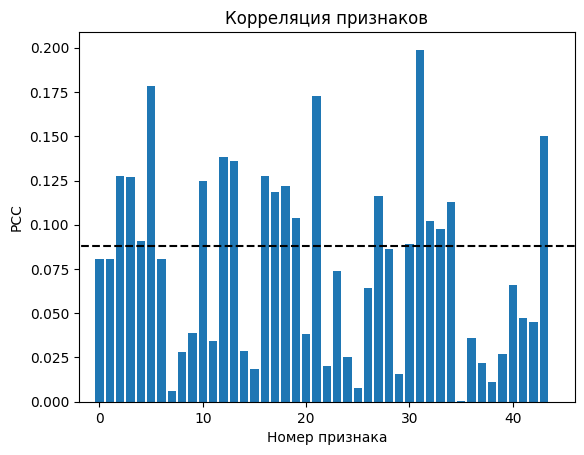

In [152]:
import scipy

t = scipy.stats.t.ppf(0.95, x.shape[0] - 2)
pcc_threshold = t / np.sqrt(x.shape[0] - 2 + t * t)

plt.bar(list(range(len(values))), values)
plt.hlines(pcc_threshold, xmin=-5, xmax=len(values) + 5, color='black', linestyle='--')
plt.xlim(-2, len(values) + 2)
plt.xlabel('Номер признака')
plt.ylabel('PCC')
plt.title('Корреляция признаков')
plt.savefig('figures/correlation.png', dpi=300)

In [156]:
len([x for x in values if x > pcc_threshold])

19

0.1244883851623007

In [140]:
x.shape[1]

44